# World Happiness report 2021 -EDA

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Perform exploratory data analysis and answer specific questions with Happiness data 2021 from the United Nations. we will visualize data and see how happiness of a country is related to factors such as GDP, Social Support, Corruption, Life Expectancy, etc.


In [2]:
# import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# set the parameters to control general style of plot
sns.set_style('darkgrid')
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams["figure.facecolor"] = '#FFE5B4'

In [4]:
# load dataset
data = pd.read_csv("/content/drive/MyDrive/World Happiness EDA/world-happiness-report-2021.csv")
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
# filter necessary columns for EDA
data_columns = ['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
data = data[data_columns].copy()

# rename columns
happy_df = data.rename({
    "Country name" : "country_name",
    "Regional indicator": "regional_indicator",
    "Ladder score" : "happines_score",
    "Logged GDP per capita" : "logged_gdp_per_capita",
    "Social support" : "social_support",
    "Healthy life expectancy" : "healthy_life_expectancy",
    "Freedom to make life choices" : "freedom_to_make_life_choice",
    "Generosity" : "generosity",
    "Perceptions of corruption" : "perception_of_corruption"
}, axis = 1)

# view happy_df data
happy_df.head()


,country_name,regional_indicator,happines_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choice,generosity,perception_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [6]:
# Check missing value
happy_df.isnull().sum()

country_name                   0
regional_indicator             0
happines_score                 0
logged_gdp_per_capita          0
social_support                 0
healthy_life_expectancy        0
freedom_to_make_life_choice    0
generosity                     0
perception_of_corruption       0
dtype: int64

There is no missing value.

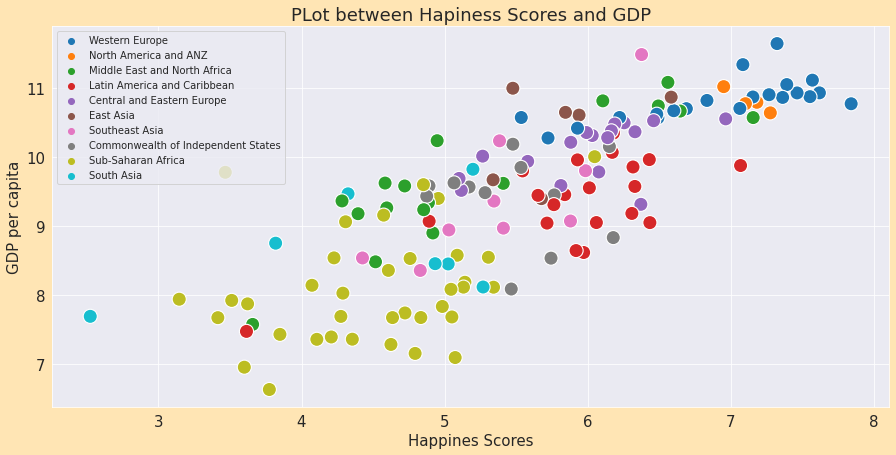

In [7]:
# plot happiness score and gdp for different region
plt.rcParams['figure.figsize'] = (15, 7)
plt.title('PLot between Hapiness Scores and GDP')
sns.scatterplot(x = happy_df.happines_score, y= happy_df.logged_gdp_per_capita, hue = happy_df.regional_indicator, s = 200)
plt.legend(loc = 'upper left', fontsize = 10)
plt.xlabel("Happines Scores")
plt.ylabel("GDP per capita")
plt.show()

Highest GDP and Highest Happiness Score region is **Western Europe**. **Sun-Saharan Africa** has Low Happiness score and GDP also. For that we can say that Happiness score strongly depends on GDP per capita.

In [8]:
# total countries
total_countries = happy_df.groupby("regional_indicator")['country_name'].count()
total_countries

regional_indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: country_name, dtype: int64

Sub-Saharan Africa has 36 country.

In [9]:
# Which region has the highest contribution to the world GDP as per our data?
gdp_region = happy_df.groupby("regional_indicator")["logged_gdp_per_capita"].sum()
gdp_region

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_gdp_per_capita, dtype: float64

Text(0, 0.5, ' ')

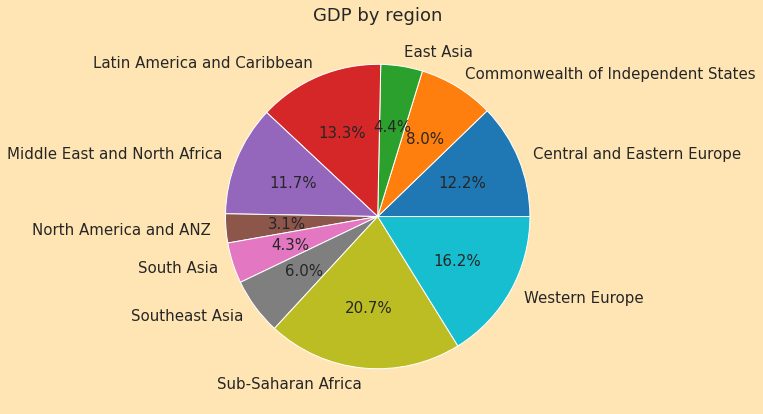

In [10]:
gdp_region.plot.pie(autopct = "%1.1f%%")
plt.title("GDP by region")
plt.ylabel(" ")

Sub-Saharan Africa contribute world GDP to 20.7%. That'sthe highst. Because there are 36 countries. North America and ANZ has the lowest contribution(3.1%) beacuse of there are only four countries.

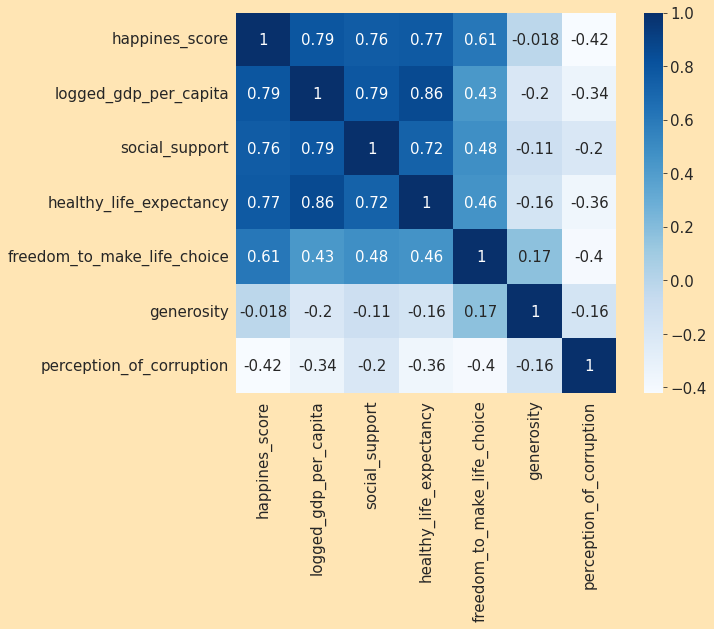

In [20]:
# Correlation map
cor = happy_df.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(cor, square = True, annot = True,  cmap = "Blues", ax=ax)

The darkest box represent strong correlation and light box represent weak correlation. There is a very strong correlation between happiness score and gdp(0.79). Also between happiness score and social support(0.76).
There is very weak relation.

In [22]:
# corruption in different regions
corruption = happy_df.groupby('regional_indicator')[['perception_of_corruption']].mean()
corruption

,perception_of_corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


Here we see that the highest Central and Eastern Europe has the highest perception of corruption(0.85) and North America and ANZ has the least(0.44). 

<BarContainer object of 10 artists>

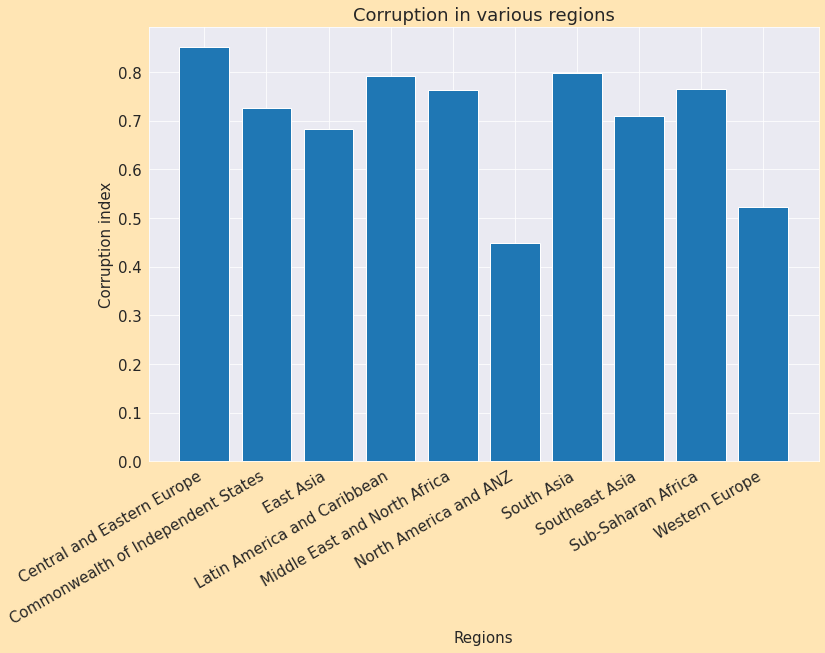

In [25]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.title("Corruption in various regions")
plt.xlabel("Regions", fontsize=15)
plt.ylabel("Corruption index", fontsize=15)
plt.xticks(rotation = 30, ha = "right")
plt.bar(corruption.index, corruption.perception_of_corruption)

In [27]:
# Find the life expectancy of top 10 happiest and bottom 10 least happy countries
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

Text(596.1068181818181, 0.5, 'Life Expectancy')

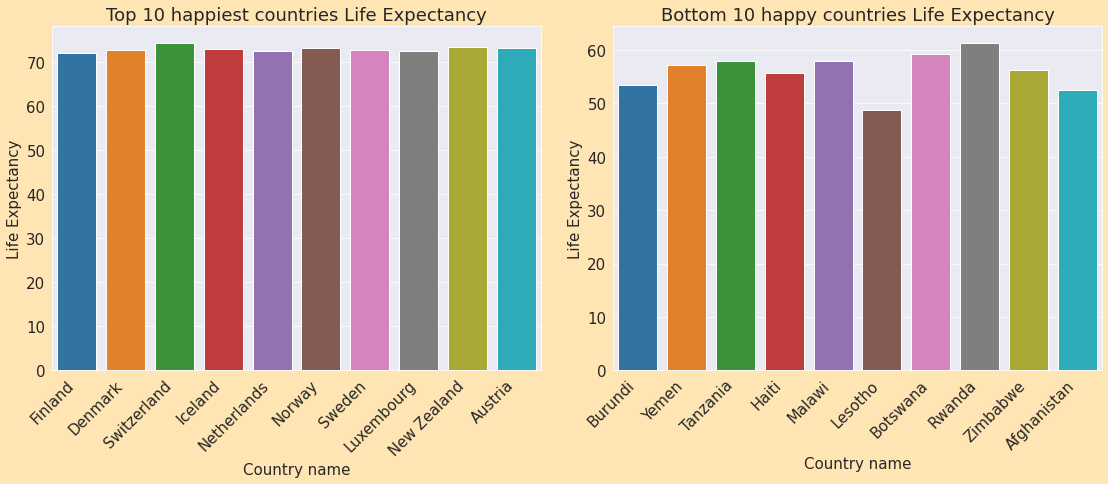

In [28]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))
plt.tight_layout(pad=2)
xlabels = top_10.country_name
axes[0].set_title("Top 10 happiest countries Life Expectancy")
axes[0].set_xticklabels(xlabels, rotation=45, ha="right")
sns.barplot(x = top_10.country_name, y = top_10.healthy_life_expectancy, ax = axes[0])
axes[0].set_xlabel("Country name")
axes[0].set_ylabel("Life Expectancy")

xlabels = bottom_10.country_name
axes[1].set_title("Bottom 10 least happy countries Life Expectancy")
axes[1].set_xticklabels(xlabels, rotation=45, ha="right")
sns.barplot(x = bottom_10.country_name, y = bottom_10.healthy_life_expectancy, ax = axes[1])
axes[1].set_xlabel("Country name")
axes[1].set_ylabel("Life Expectancy")


Here we see that the top 10 happiest countries Life Expectancy almost same(Above 70 years). On the otherhand bottom 10 least happy country most of them Life Expectancy below 60.

Text(0, 0.5, 'Happiness scores')

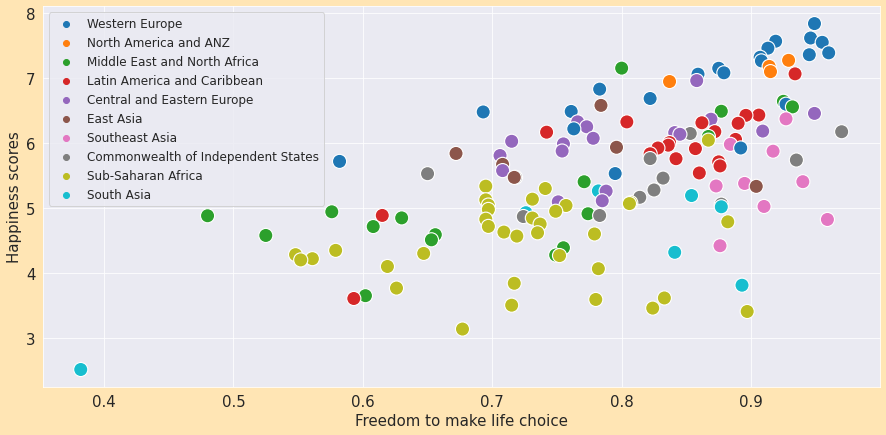

In [29]:
# plt between freedom to make life choice and happiness scores
plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(x = happy_df.freedom_to_make_life_choice, y = happy_df.happines_score, hue = happy_df.regional_indicator, s=200)
plt.legend(loc = "upper left", fontsize = 12)
plt.xlabel("Freedom to make life choice")
plt.ylabel("Happiness scores")

Highest freedom and Highest Happiness Score region is Western Europe. Middle East and North Africa has Low Happiness score and freedom also.<br>
Very interesting fact is Southeast Asia has comperatively low happiness score but freedom score is higher(more than point-8).

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

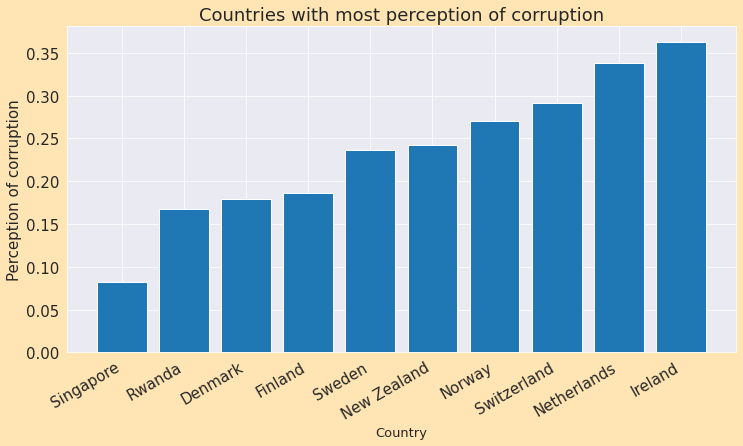

In [30]:
# top 10 corrupted countries
country = happy_df.sort_values(by="perception_of_corruption").head(10)
plt.rcParams['figure.figsize'] = (12, 6)
plt.bar(country.country_name, country.perception_of_corruption)
plt.title("Countries with most perception of corruption")
plt.xlabel("Country", fontsize=13)
plt.ylabel("Corruption index")
plt.xticks(rotation=30, ha="right")

Here we see that Ireland has the highest correction index and Singapore has least.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

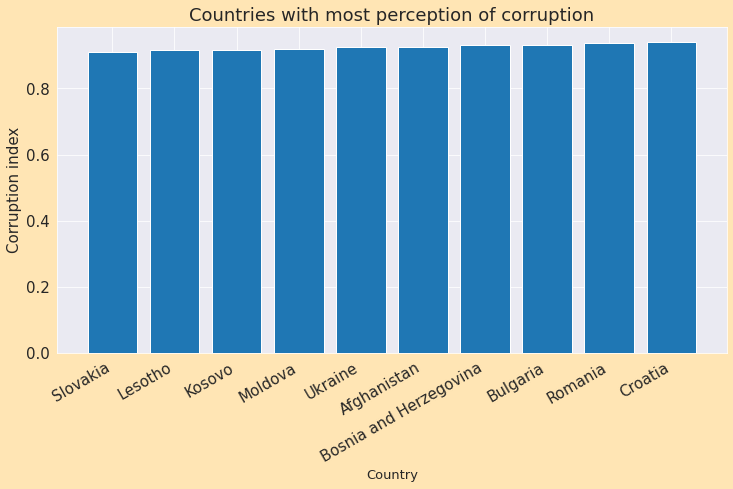

In [31]:
# bottom 10 corrupted countries
country = happy_df.sort_values(by="perception_of_corruption").tail(10)
plt.rcParams['figure.figsize'] = (12, 6)
plt.bar(country.country_name, country.perception_of_corruption)
plt.title("Countries with most perception of corruption")
plt.xlabel("Country", fontsize=13)
plt.ylabel("Corruption index")
plt.xticks(rotation=30, ha="right")

Here Almost all the countries have high corruption index(0.85).

Text(0, 0.5, 'Corruption')

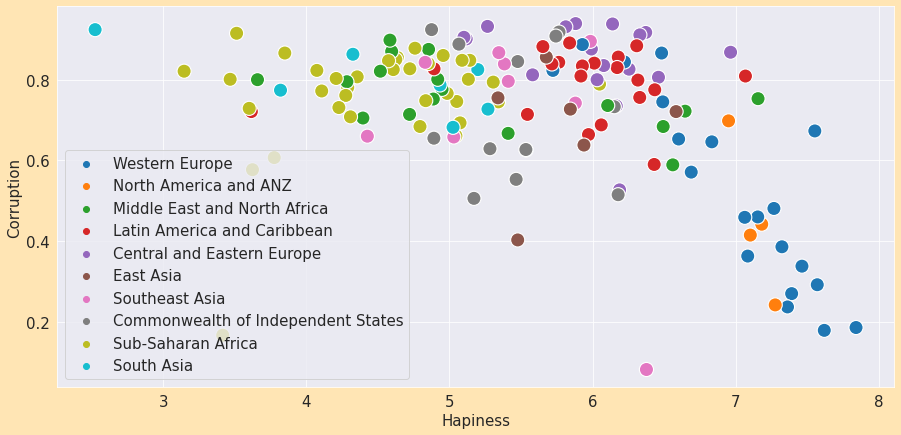

In [33]:
# corruption vs happiness
plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(x = happy_df.happines_score, y = happy_df.perception_of_corruption, hue = happy_df.regional_indicator, s=200)
plt.legend(loc = "lower left", fontsize = 15)
plt.xlabel("Hapiness")
plt.ylabel("Corruption")

Those regions have the lower corruption index, those happiness score is high(Western Europe). Those regions have the highest corruption index, those happiness score is low(Sub Saharan Africa).